# TD - Introduction √† Numpy & Matplotlib 

L'objectif de ce TD est de se familiariser avec les principales librairies num√©riques de Python, √† savoir [numpy](https://docs.scipy.org/doc/numpy/reference/), [scipy](https://docs.scipy.org/doc/scipy/reference/) et [matplotlib](http://www.matplotlib.org). 

Vous importerez ces biblioth√®ques avec les instructions suivantes:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

<font color="darkred">Les parties not√©es ¬´ **Pour aller plus loin** ¬ª sont √† traiter chez vous ou √† la fin du TP si le temps le permet.</font>

**IMPORTANT:** n'oubliez pas d'ajouter des commentaires √† votre code.

## <font color="darkgreen">Rappels Matplotlib</font>

La fonction de haut niveau [`plt.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) permet de g√©n√©rer, dans son utilisation la plus simple, une figure (`fig`) et un 
syst√®me d'axe (`ax`):

```python
fig, ax = plt.subplots(1, 1)  # Figure √† 1√ó1=1 syst. d'axes
```

* `fig` est un objet de type `Figure` contenant un (ou plusieurs) syst√®me(s) d'axes, et pouvant √™tre affich√© ou sauvegard√© (p.ex. au format PDF ou PNG);
* `ax` est un objet de type `Axes` disposant de nombreuses m√©thodes de visualisation (`plot`, `scatter`, `imshow`, `hist`, etc.), et de personalisation (`xlabel`, `xscale`, `title`, `legend`, `grid`, etc.).
  
  <img src="https://matplotlib.org/_images/anatomy.png" alt="Anatomie d'une figure." width="400">

## Trac√© de courbes (1D)

### Figure de diffraction par une fente fine

La r√©partition de l'intensit√© lumineuse d'une onde monochromatique diffract√©e par une fente fine de largeur $a$ est:

$$
I(\theta) = I_0 \,\sin_c^2\left(\frac{\pi a \sin \theta}{\lambda}\right)
$$
o√π $\lambda$ est la longeur d'onde, $\theta$ l'angle au centre et $I_0$ l'intensit√© au centre de la figure de diffraction.

Nous allons tracer l'allure de la fonction $I/I_0$ en fonction de $x = (\pi a \sin \theta)/\lambda$.

* G√©n√©rer un vecteur $x$ de 200 points entre $\pm 4\pi$ (√† l'aide de la fonction [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html))
* G√©nerer le vecteur $y = \sin_c(x)$ (utiliser [`numpy.sinc`](https://numpy.org/doc/stable/reference/generated/numpy.sinc.html) $=\sin(\pi x)/(\pi x)$)

In [2]:
x = np.linspace(-4 * np.pi, +4 * np.pi, 200)
y = np.sinc(x / np.pi)

* Dans une figure √† un syst√®me d'axe, tracer conjointement $y$ et $y^2$ en fonction de $x$.
* Agr√©menter la figure pour la rendre compr√©hensible (titre de la figure et des axes, l√©gende, etc.).
* Sauvegarder la figure au format PDF (utiliser [`plt.savefig`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html))

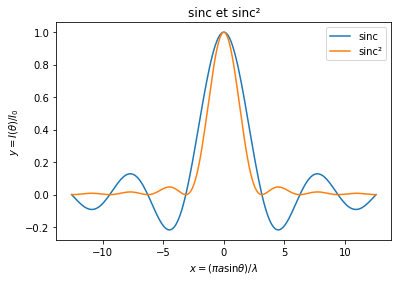

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, label='sinc')       # Trac√© y(x)
ax.plot(x, y**2, label=u'sinc¬≤')  # Trac√© y¬≤(x)
ax.set(title=u'sinc et sinc¬≤',    # Titre et intitul√© des axes
       xlabel=r'$x = (\pi a \sin\theta)/\lambda$', ylabel=r'$y = I(\theta)/I_0$')
ax.legend()                       # L√©gende
plt.savefig("diffraction.pdf")    # Sauvegarde au format PDF

#### <font color="darkred">Pour aller plus loin</font>
1. Modifier le code pour prendre en compte une largeur de fente et une longueur d'onde pr√©cise.
2. En choisissant diff√©rentes valeurs de $a$ et $\lambda$, tracer sur une m√™me figure l'√©volution de la figure de diffraction:
   * pour des largeurs de fentes diff√©rentes, √† une seule longueur d'onde,  
   * pour diff√©rentes longueurs d'onde, avec une fente de largeur fix√©e. 


### Tr√®fles de Habenicht (courbe polaire)

Les tr√®fles de Habenicht sont des courbes ¬´ornementales¬ª en repr√©sentation polaire, d'√©quation
$$
r_n(\theta) = 1 + \cos n\theta + \sin^2 n\theta, \qquad n\in \mathbb{N}^*
$$
    
* D√©finir la fonction `habenicht(n, theta)` permettant de calculer $r_n(\theta)$.

In [4]:
def habenicht(n, theta):
    
    return 1 + np.cos(n * theta) + np.sin(n * theta) ** 2

* G√©n√©rer un vecteur $\theta$ de 200 points entre 0 et $2\pi$.
* G√©nerer les tableaux 1D `r3`, `r5` et `r7` des valeurs de $r_n(\theta)$ pour $n = 3, 5, 7$.

In [5]:
theta = np.linspace(0, 2 * np.pi, 100)

r3 = habenicht(3, theta)
r5 = habenicht(5, theta)
r7 = habenicht(7, theta)

#### <font color="darkgreen">Rappel</font>

Pour tracer une courbe en coordonn√©es polaires, il faut un syst√®me d'axes adapt√©:

```python
fig = plt.figure()                                   # Cr√©ation de la figure seule
ax = fig.add_subplot(1, 1, 1, projection='polar')    # Ajout d'un syst. d'axes en polaire
```

* Tracer dans un m√™me syst√®me d'axes les diff√©rentes courbes polaires $r_{n=3,5,7}(\theta)$.

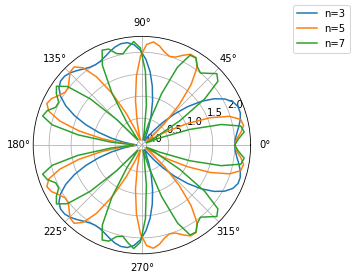

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='polar')
ax.plot(theta, r3, label='n=3')
ax.plot(theta, r5, label='n=5')
ax.plot(theta, r7, label='n=7')
fig.legend();

### <font color="darkgreen">Rappels sur les complexes</font>

Python et numpy g√®rent nativement les complexes (le nombre imaginaire pur est not√© $j$). Pour un complexe $z = a + bj = \rho\,e^{j\theta}$, on a 
* `z = a + b * 1j` ou `z = rho * np.exp(1j * theta)`
* parties r√©elle et imaginaire: `a = np.real(z)`, `b = np.imag(z)`, 
* module et argument: `rho = np.abs(z)`, `theta = np.angle(z)` (en radians).

In [7]:
z = 1 + 2j
print("z:", z)
print("Parties r√©elle et imaginaire:", np.real(z), np.imag(z))
print("Module et argument:", np.abs(z), np.angle(z))

z: (1+2j)
Parties r√©elle et imaginaire: 1.0 2.0
Module et argument: 2.23606797749979 1.1071487177940904


### Filtre passe-haut (diagramme de Bode)

La fonction de transfert $H$ d'un filtre est d√©finie comme le rapport entre le signal (complexe) de sortie $S$ et le signal (complexe) d'entr√©e $E$: $H = S/E$. $H$ est une grandeur complexe fonction de la pulsation $\omega$, et dont le module donne le facteur d'att√©nuation/amplification (*gain*) et l'argument le d√©phasage entre les signaux de sortie et d'entr√©e (*phase*).

Un filtre ¬´passe-haut¬ª permet de ne laisser passer que les signaux dont la pulsation $\omega = 2\pi f$ est sup√©rieure √† une valeur de coupure $\omega_0$ et d'att√©nuer les signaux de fr√©quence inf√©rieure.

Nous voulons √©tudier le filtre passe-haut du 2e ordre dont la fonction de transfert complexe est:
$$
H_Q^{PH2}(x) = \frac{-x^2}{1 - x^2 + j x/Q}
$$
o√π $x = \omega/\omega_0$ est la pulsation r√©duite, et $Q>0$ le facteur de qualit√©.

Nous allons pour cela tracer son *diagramme de Bode*, constitu√© de deux graphiques repr√©sentant le comportement fr√©quentiel (en √©chelle logarithmique) de son gain (exprim√© en dB) et de sa phase. 

* D√©finir une fonction `H_PH2(x, Q=1)` retournant la fonction de transfert complexe pr√©c√©dente (on choisit un facteur de qualit√© $Q=1$ par d√©faut).

In [8]:
def H_PH2(x, Q=1):
    """
    Fonction de transfert complexe d'un filtre passe-haut du 2e ordre.
    
    x: pulsation r√©duite
    Q: facteur de qualit√©
    """
    
    return -x**2 / (1 - x**2 + 1j * x / Q)

* D√©finir une fonction `gain_dB(H)` retournant le gain en dB de la fonction de transfert complexe `H`: $G_{dB} = 20\log_{10} |H|$.  Pour la phase, utiliser directement la fonction `numpy.angle`.

In [9]:
def gain_dB(H):
    "Gain en dB."
    
    return 20 * np.log10(np.abs(H))

* G√©n√©rer un vecteur ùë• de 100 points dispos√©s logarithmiquement entre 0.1 et 10 ([`numpy.logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)).
* Tracer dans 2 syst√®mes d'axes superpos√©s (`plt.subplots(2, 1)`) le gain (en dB) et la phase (en radians) du filtre $H_Q^{PH2}(x)$ pour $Q=1/5$, $Q=1$ et $Q=5$.

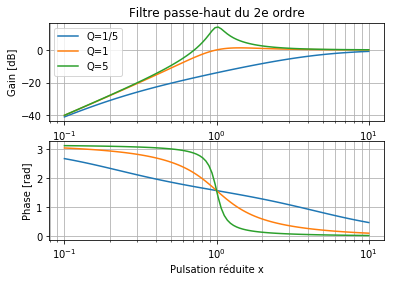

In [10]:
x = np.logspace(-1, 1, 100)

fig, (ax1, ax2) = plt.subplots(2, 1)

# Gain [dB]
ax1.plot(x, gain_dB(H_PH2(x, Q=0.2)), label='Q=1/5')
ax1.plot(x, gain_dB(H_PH2(x, Q=1)), label='Q=1')
ax1.plot(x, gain_dB(H_PH2(x, Q=5)), label='Q=5')

# Phase [rad]
ax2.plot(x, np.angle(H_PH2(x, Q=0.2)))
ax2.plot(x, np.angle(H_PH2(x, Q=1)))
ax2.plot(x, np.angle(H_PH2(x, Q=5)))

ax1.set(ylabel='Gain [dB]', xscale='log', title='Filtre passe-haut du 2e ordre')
ax2.set(xlabel=u'Pulsation r√©duite x', xscale='log', ylabel='Phase [rad]')
ax1.legend()
ax1.grid(which='both')
ax2.grid(which='both')

### √âtalonnage d'un monochromateur avec une lampe √† vapeur de mercure

Un monochromateur est un dispositif optique permettant de mesurer ou de selectionner une longue d'onde pr√©cise d'un rayonnement. Il est constitu√© d'un syst√®me dispersif qui peut √™tre un prisme ou un r√©seau. L'√©talonnage d'un monochromateur a pour objectif de d√©terminer la relation $\lambda = f(p)$ entre la position $p$ du syst√®me dispersif (p.ex. un angle) et la longueur d'onde $\lambda$ du rayonnement.

Le fichier [`etalonnageMonochromateur.dat`](etalonnageMonochromateur.txt) contient les donn√©es $p, \lambda, \delta p$ obtenues lors de l'√©talonnage d'un monochromateur √† l'aide d'une lampe √† vapeur de mercure dont les longueurs d'onde sont connues.

* Ouvrir le fichier [`etalonnageMonochromateur.dat`](etalonnageMonochromateur.txt) avec un √©diteur de texte ou jupyter pour d√©terminer la strcuture du fichier (nombre, s√©paration, contenu des colonnes, commentaires, etc.).
* Connaissant la structure du fichier, charger les donn√©es dans un tableau numpy avec [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html). Quel est le format du tableau r√©sultant?

In [11]:
# lecture des donn√©es √† partir d'un fichier "classique" (s√©paration par des espaces, commentaires '#')
data = np.loadtxt('etalonnageMonochromateur.dat')
print(data.shape)

(6, 3)


* Tracer les donn√©es $\lambda = f(p)$ dans un graphique.

**<font color="darkgreen">Rappel:</font>** dans un tableau 2D, les lignes et les colonnes sont accessibles par *slice*, p.ex. `data[0]` et `data[:, 1]` donnent respectivement acc√®s √† la 1re ligne et 2e colonne du tableau `data`.

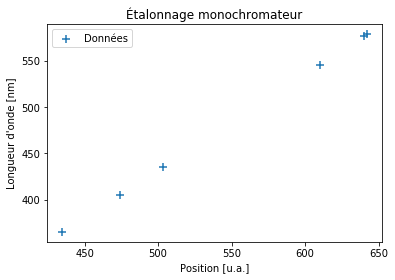

In [12]:
position = data[:, 0]    # 1e colonne
wavelength = data[:, 1]  # 2e colonne

fig, ax = plt.subplots(1, 1)
ax.scatter(position, wavelength, marker='+', s=50, label=u'Donn√©es')
ax.set(title=u'√âtalonnage monochromateur',
       xlabel='Position [u.a.]', ylabel = "Longueur d'onde [nm]")
ax.legend();

√âtalonner le monochromateur consiste √† d√©terminer une relation analytique approchant ¬´au mieux¬ª la relation entre les valeurs $(p_i, \lambda_i)$ observ√©e avec la lampe d'√©talonnage. Une fois cette relation √©tablie, elle permet de pr√©dire la longueur d'onde correspondant √† une position $p$ quelconque (dans le domaine de validit√© de la relation d'√©talonnage). 

Compte tenu de la r√©partition lin√©aire des points $(\lambda_i, p_i)$, la relation d'√©talonnage sera obtenue en ajustant les donn√©es avec une *r√©gression lin√©aire* $\lambda = a p + b$ (utiliser [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)):
```python
a, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
```
Le *coefficient de corr√©lation lin√©aire* $r$ (`r_value`) indique le degr√© de corr√©lation lin√©aire entre les deux variables ($-1 \leq r \leq +1$, on regarde en g√©n√©ral le *coeff. de d√©termination* $r^2$). (Les deux autres param√®tres `p_value` et `std_err` ne sont pas consid√©r√©s ici.)

* D√©terminer et afficher l'√©quation de la droite d'√©talonnage $\lambda = a p + b$, ainsi que son coefficient de d√©termination $r^2$.

In [13]:
a, b, r_value, p_value, std_err = scipy.stats.linregress(position, wavelength)
print("√âq. de la droite d'√©talonnage: lambda = {:.3f} position {:+.3f} (r¬≤ = {:.3f})".format(a, b, r_value**2))

√âq. de la droite d'√©talonnage: lambda = 1.035 position -85.632 (r¬≤ = 1.000)


* Ajouter la droite d'√©talonnage $\lambda = a p + b$ √† la figure pr√©cedente.  Les longueurs d'onde seront calcul√©es pour des valeurs de $p$ comprises entre 400 et 700.

  <font color="darkgreen">**Rappel:**</font> en mode non-interactif(`%matplotlib inline`), si une figure `fig` existe d√©ja, il est n√©cessaire de la r√©afficher (`fig`) apr√®s modification. En mode int√©ractif (`%matplotlib notebook`), la figure est automatiquement mise √† jour au fur et √† mesure.

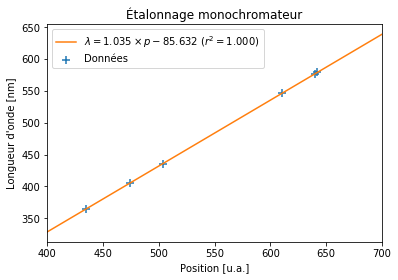

In [14]:
p = np.linspace(400, 700, 2)
ax.plot(p, a * p + b, color='C1', label=r"$\lambda = {:.3f}\times p {:+.3f}$ ($r^2 = {:.3f}$)".format(a, b, r_value**2))
ax.legend();
ax.set(xlim=(400, 700))
fig

<font color="darkred">**Pour aller plus loin:** 
Ajouter sur la figure les [barres d'erreur](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) $\delta p$ sur la position $p$. En toute rigueur, il faudrait en tenir compte dans l'ajustement de la loi d'√©talonnage (*moindres carr√©s pond√©r√©s*).

Pour la lisibilit√©, vous devrez multiplier les barres d'erreur $\delta p$ par un facteur multiplicatif pour les visualiser distinctement sur la figure. Ajouter cette information sur la figure.
</font>

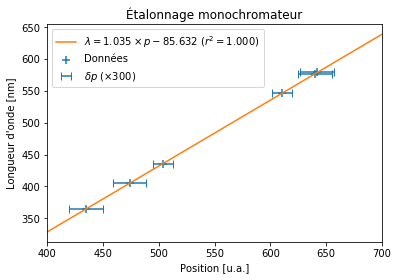

In [15]:
errFactor = 300
delta_p = data[:,2] * errFactor 

ax.errorbar(position, wavelength, xerr=delta_p, fmt='none', ecolor='C0', capsize=4, label=r"$\delta p$ ($\times{})$".format(errFactor))
ax.legend()
fig

## Le quartet d'Anscombe

Nous allons charger et √©tudier 4 jeux de donn√©es $(x, y)$, d'abord en calculant des statistiques descriptives (moyennes, √©carts type, etc.) puis en les visualisant.

* Utiliser la fonction `numpy.loadtxt` pour charger les donn√©es du fichier [`anscombe.dat`](anscombe.dat) disponible depuis Claroline. Quel format (*shape*) a le tableau de retour?

In [16]:
data = np.loadtxt('anscombe.dat')
print(data.shape)

(11, 8)


* Extraire du tableau pr√©c√©dent 4 jeux de donn√©es `j1` (les 2 premi√®res colonnes), `j2` (les 2 suivantes), `j3` et `j4`, chacun de format $(11, 2)$.

In [17]:
j1 = data[:, 0:2]
j2 = data[:, 2:4]
j3 = data[:, 4:6]
j4 = data[:, 6:8]

print(j1.shape)

(11, 2)


* Pour chacun des 4 jeux de donn√©es `x, y = j.T`, calculer et afficher (avec 2 chiffres apr√®s la virgule) les statistiques suivantes:
  - les moyennes de $x$ et $y$ ([`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)),
  - les √©carts-type de $x$ et $y$ ([`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)),
  - le coefficient de corr√©lation entre $x$ et $y$ ([`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)),
  - l'√©quation de la droite de r√©gression lin√©aire $y = ax + b$ ([`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)).
  
  Que constatez-vous? Que pouvez-vous en d√©duire?

In [18]:
for i, ji in enumerate([j1, j2, j3, j4], start=1):
    print(" Jeu #{} ".format(i).center(34, '='))
    x, y = ji.T
    print("Moyennes:           x={:.2f}, y={:.2f}".format(np.mean(x), np.mean(y)))
    print("√âcarts-type:        x={:.2f}, y={:.2f}".format(np.std(x), np.std(y)))
    r, _ = scipy.stats.pearsonr(x, y)
    print("Coeff. corr√©lation: r={:.2f}".format(r))
    # slope, intercept, r_value, p_value, std_err
    a, b, _, _, _ = scipy.stats.linregress(x, y)
    print("R√©g. lin√©aire:      a={:.2f}, b={:.2f}".format(a, b))

============= Jeu #1 =============
Moyennes:           x=9.00, y=7.50
√âcarts-type:        x=3.16, y=1.94
Coeff. corr√©lation: r=0.82
R√©g. lin√©aire:      a=0.50, b=3.00
============= Jeu #2 =============
Moyennes:           x=9.00, y=7.50
√âcarts-type:        x=3.16, y=1.94
Coeff. corr√©lation: r=0.82
R√©g. lin√©aire:      a=0.50, b=3.00
============= Jeu #3 =============
Moyennes:           x=9.00, y=7.50
√âcarts-type:        x=3.16, y=1.94
Coeff. corr√©lation: r=0.82
R√©g. lin√©aire:      a=0.50, b=3.00
============= Jeu #4 =============
Moyennes:           x=9.00, y=7.50
√âcarts-type:        x=3.16, y=1.94
Coeff. corr√©lation: r=0.82
R√©g. lin√©aire:      a=0.50, b=3.00


* Au sein d'une m√™me figure (`plt.subplots(2, 2)`), tracer les 4 jeux de donn√©es $(x_i,y_i)$ (p.ex. `plot(x, y, 'bo')`), en y ajoutant √† chaque fois la droite de r√©gression lin√©aire (p.ex. `plot(x, a*x+b, 'r-')`). 

  Que conclure?

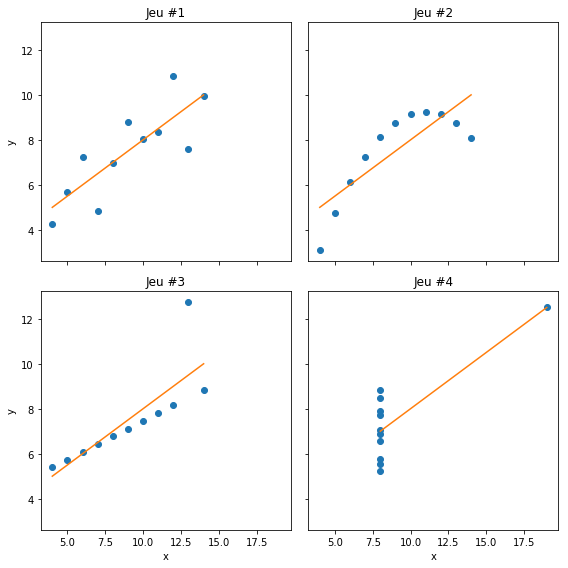

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)  # retourne un tableau axs de format (2, 2)

for i, ji in enumerate([j1, j2, j3, j4]):
    x, y = ji.T
    a, b, _, _, _ = scipy.stats.linregress(x, y)
    xx = np.array([x.min(), x.max()])
    
    axs[i//2, i%2].plot(x, y, ls='none', marker='o')
    axs[i//2, i%2].plot(xx, a*xx + b)
    axs[i//2, i%2].set(title="Jeu #{}".format(i + 1))

[ ax.set(xlabel='x') for ax in axs[1] ]
[ ax.set(ylabel='y') for ax in axs[:, 0] ]
fig.tight_layout()